## 코호트 분석

           고객수  이탈고객수    이탈율 (%)
가입 기간 그룹                        
0         2092    704  33.652008
1         1262     68   5.388273
2          924     56   6.060606
3          601     36   5.990017
4          383      0   0.000000
5          113      0   0.000000
8            2      0   0.000000
10           2      0   0.000000


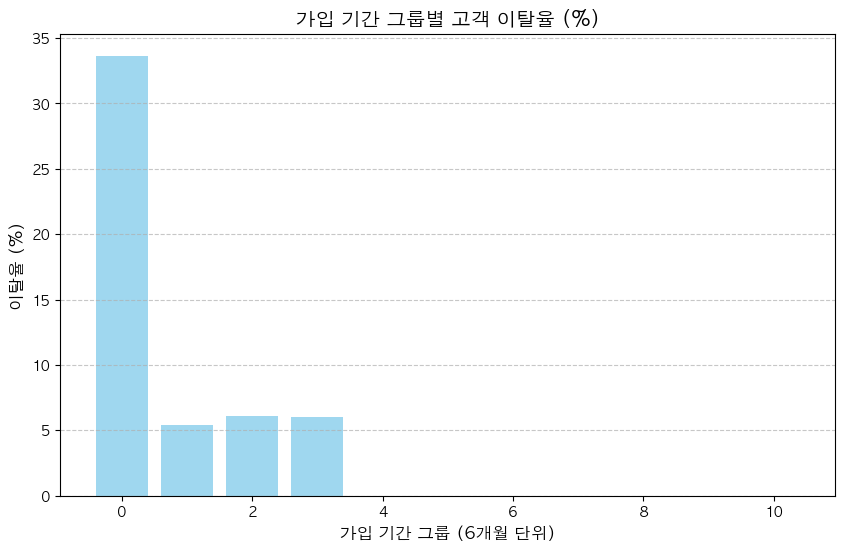

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')  # 윈도우의 경우
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')   # MacOS의 경우
else:
    rc('font', family='NanumGothic')   # 리눅스의 경우

# 마이너스 폰트 설정 (음수 기호 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 파일 경로
file_path = '/Users/pjh_air/Documents/GitHub/sg_2cha/yb/쇼핑몰이탈정제.csv'

# 데이터 로드
data = pd.read_csv(file_path)

# 코호트 분석 준비: 가입 기간을 기준으로 코호트 생성
data['가입 기간 그룹'] = data['가입 기간'].apply(lambda x: int(x // 6))  # 6개월 단위 그룹화

# 이탈 여부를 그룹별로 계산
cohort_analysis = data.groupby('가입 기간 그룹').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)

# 이탈율 계산
cohort_analysis['이탈율 (%)'] = (cohort_analysis['이탈고객수'] / cohort_analysis['고객수']) * 100

# 결과 출력
print(cohort_analysis)

# 결과를 CSV 파일로 저장 (선택 사항)
cohort_analysis.to_csv('/Users/pjh_air/Documents/GitHub/sg_2cha/yb/코호트_분석_결과.csv', index=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(cohort_analysis.index, cohort_analysis['이탈율 (%)'], color='skyblue', alpha=0.8)
plt.title('가입 기간 그룹별 고객 이탈율 (%)', fontsize=14)
plt.xlabel('가입 기간 그룹 (6개월 단위)', fontsize=12)
plt.ylabel('이탈율 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 첫 구매 날짜 기준 코호트 분석 코드

          고객수  이탈고객수    이탈율 (%)
구매 연도-월                        
2020-01  1129    577  51.107174
2020-03   569     91  15.992970
2020-04   196     20  10.204082
2020-05   198     16   8.080808
2020-06   174      6   3.448276
2020-07   211     12   5.687204
2020-08   248     16   6.451613
2020-09   237     12   5.063291
2020-10   211     14   6.635071
2020-11   181      8   4.419890
2020-12   182      7   3.846154
2021-01   173     13   7.514451
2021-02   172     12   6.976744
2021-03   151     10   6.622517
2021-04   144     10   6.944444
2021-05   102      4   3.921569
2021-06   119      6   5.042017
2021-07   136      8   5.882353
2021-08   105     12  11.428571
2021-09    80     10  12.500000
2021-10    74      0   0.000000
2021-11    87      0   0.000000
2021-12    75      0   0.000000
2022-01    59      0   0.000000
2022-02    58      0   0.000000
2022-03    66      0   0.000000
2022-04    70      0   0.000000
2022-05    55      0   0.000000
2022-06    64      0   0.000000
2022-07 

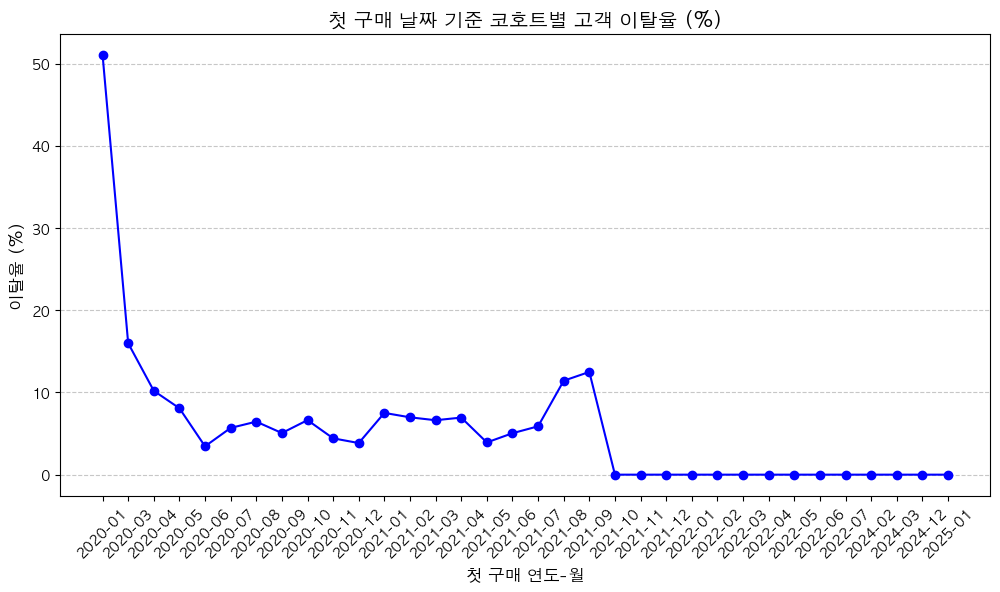

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import platform
from datetime import timedelta

# 한글 폰트 설정
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')  # 윈도우의 경우
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')   # MacOS의 경우
else:
    rc('font', family='NanumGothic')   # 리눅스의 경우

# 마이너스 폰트 설정 (음수 기호 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = '/Users/pjh_air/Documents/GitHub/sg_2cha/yb/쇼핑몰이탈정제.csv'
data = pd.read_csv(file_path)

# 가입 기간이 월 단위로 기록되었다고 가정
# '가입 기간' 값을 기준으로 첫 구매 날짜 계산
base_date = pd.Timestamp('2020-01-01')  # 기준 날짜
data['첫 구매 날짜'] = data['가입 기간'].apply(lambda x: base_date + timedelta(days=x * 30))  # 약 30일을 한 달로 계산
data['구매 연도-월'] = data['첫 구매 날짜'].dt.to_period('M')  # 연-월 기준 변환

# 코호트별 이탈 여부 계산
cohort_analysis_date = data.groupby('구매 연도-월').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)

# 이탈율 계산
cohort_analysis_date['이탈율 (%)'] = (cohort_analysis_date['이탈고객수'] / cohort_analysis_date['고객수']) * 100

# 결과 출력
print(cohort_analysis_date)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(cohort_analysis_date.index.astype(str), cohort_analysis_date['이탈율 (%)'], marker='o', color='b')
plt.title('첫 구매 날짜 기준 코호트별 고객 이탈율 (%)', fontsize=14)
plt.xlabel('첫 구매 연도-월', fontsize=12)
plt.ylabel('이탈율 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


## 도시 등급 기준 코호트 분석 코드

        고객수  이탈고객수    이탈율 (%)
도시 등급                        
1      3460    462  13.352601
2       234     44  18.803419
3      1685    358  21.246291


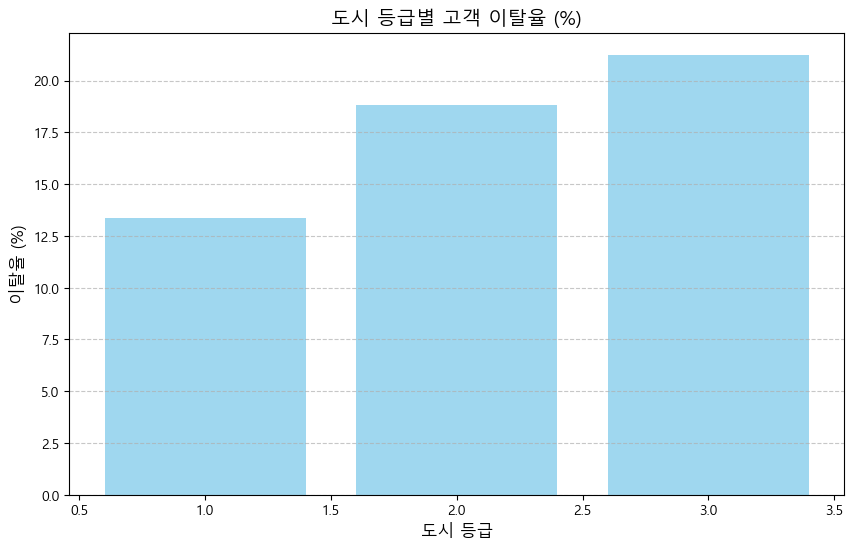

In [6]:
# 코호트 분석: 도시 등급 기준
cohort_analysis_city = data.groupby('도시 등급').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)

# 이탈율 계산
cohort_analysis_city['이탈율 (%)'] = (cohort_analysis_city['이탈고객수'] / cohort_analysis_city['고객수']) * 100

# 결과 출력
print(cohort_analysis_city)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(cohort_analysis_city.index, cohort_analysis_city['이탈율 (%)'], color='skyblue', alpha=0.8)
plt.title('도시 등급별 고객 이탈율 (%)', fontsize=14)
plt.xlabel('도시 등급', fontsize=12)
plt.ylabel('이탈율 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 가입 기간 기준 코호트 분석

           고객수  이탈고객수    이탈율 (%)
가입 기간 그룹                        
0         2092    704  33.652008
1         1262     68   5.388273
2          924     56   6.060606
3          601     36   5.990017
4          383      0   0.000000
5          113      0   0.000000
8            2      0   0.000000
10           2      0   0.000000


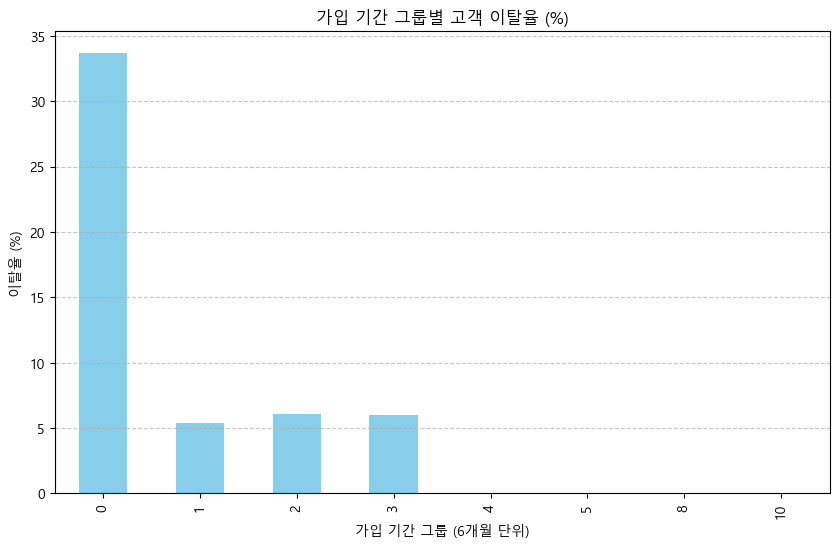

In [10]:
# 가입 기간을 기준으로 코호트 생성
data['가입 기간 그룹'] = data['가입 기간'].apply(lambda x: int(x // 6))  # 6개월 단위로 그룹화

# 코호트별 이탈율 계산
cohort_analysis = data.groupby('가입 기간 그룹').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)
cohort_analysis['이탈율 (%)'] = (cohort_analysis['이탈고객수'] / cohort_analysis['고객수']) * 100

# 결과 출력 및 시각화
print(cohort_analysis)
cohort_analysis['이탈율 (%)'].plot(kind='bar', figsize=(10, 6), color='skyblue', title='가입 기간 그룹별 고객 이탈율 (%)')
plt.xlabel('가입 기간 그룹 (6개월 단위)')
plt.ylabel('이탈율 (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 결제 방식 기준 코호트 분석

                   고객수  이탈고객수    이탈율 (%)
결제 방식                                   
CC                 181     27  14.917127
COD                333     85  25.525526
Cash on Delivery   149     23  15.436242
Credit Card       1501    193  12.858095
Debit Card        2206    332  15.049864
E wallet           608    134  22.039474
UPI                401     70  17.456359


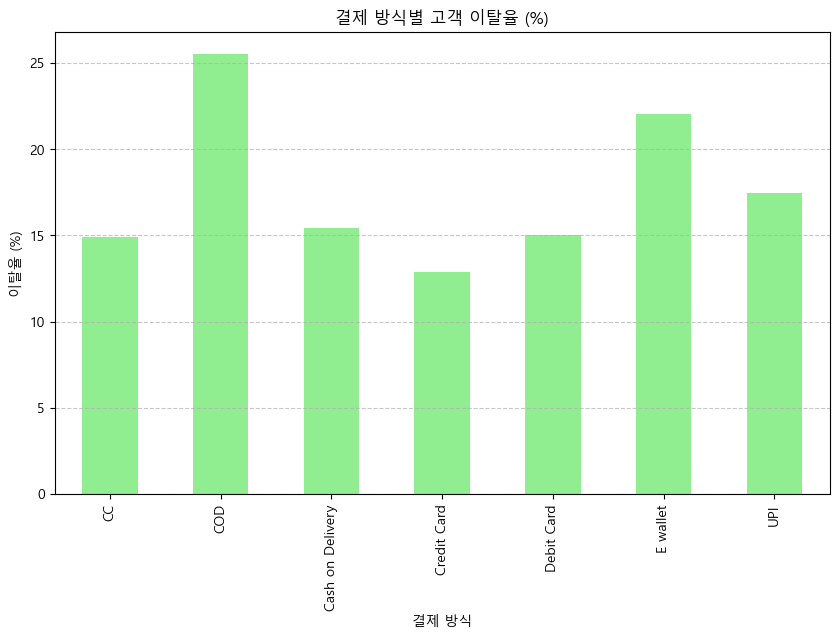

In [11]:
# 결제 방식별 코호트 분석
cohort_analysis_payment = data.groupby('결제 방식').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)
cohort_analysis_payment['이탈율 (%)'] = (cohort_analysis_payment['이탈고객수'] / cohort_analysis_payment['고객수']) * 100

# 결과 출력 및 시각화
print(cohort_analysis_payment)
cohort_analysis_payment['이탈율 (%)'].plot(kind='bar', figsize=(10, 6), color='lightgreen', title='결제 방식별 고객 이탈율 (%)')
plt.xlabel('결제 방식')
plt.ylabel('이탈율 (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 성별 기준 코호트 분석

         고객수  이탈고객수    이탈율 (%)
성별                            
Female  2149    316  14.704514
Male    3230    548  16.965944


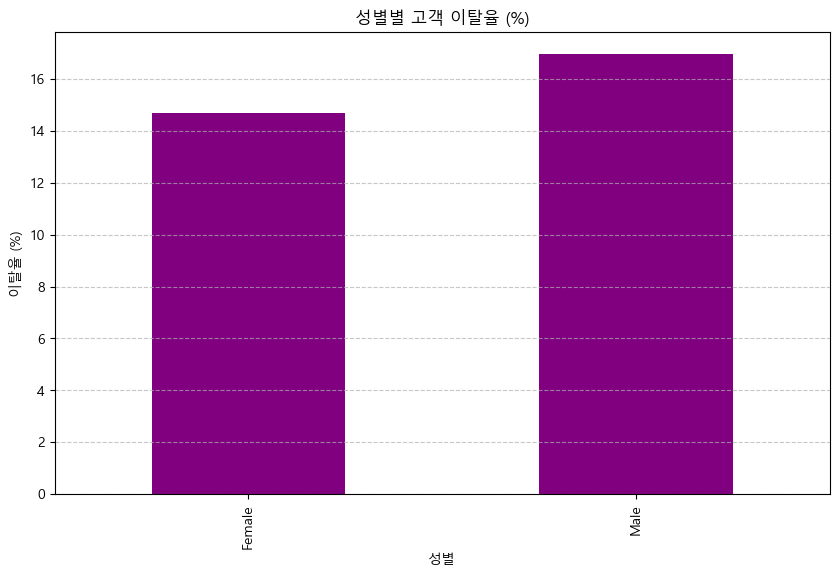

In [12]:
# 성별별 코호트 분석
cohort_analysis_gender = data.groupby('성별').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)
cohort_analysis_gender['이탈율 (%)'] = (cohort_analysis_gender['이탈고객수'] / cohort_analysis_gender['고객수']) * 100

# 결과 출력 및 시각화
print(cohort_analysis_gender)
cohort_analysis_gender['이탈율 (%)'].plot(kind='bar', figsize=(10, 6), color='purple', title='성별별 고객 이탈율 (%)')
plt.xlabel('성별')
plt.ylabel('이탈율 (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 주문 카테고리 기준 코호트 분석

                     고객수  이탈고객수    이탈율 (%)
주문 카테고리                                   
Fashion              826    128  15.496368
Grocery              410     20   4.878049
Laptop & Accessory  2041    210  10.289074
Mobile               567    136  23.985891
Mobile Phone        1271    350  27.537372
Others               264     20   7.575758


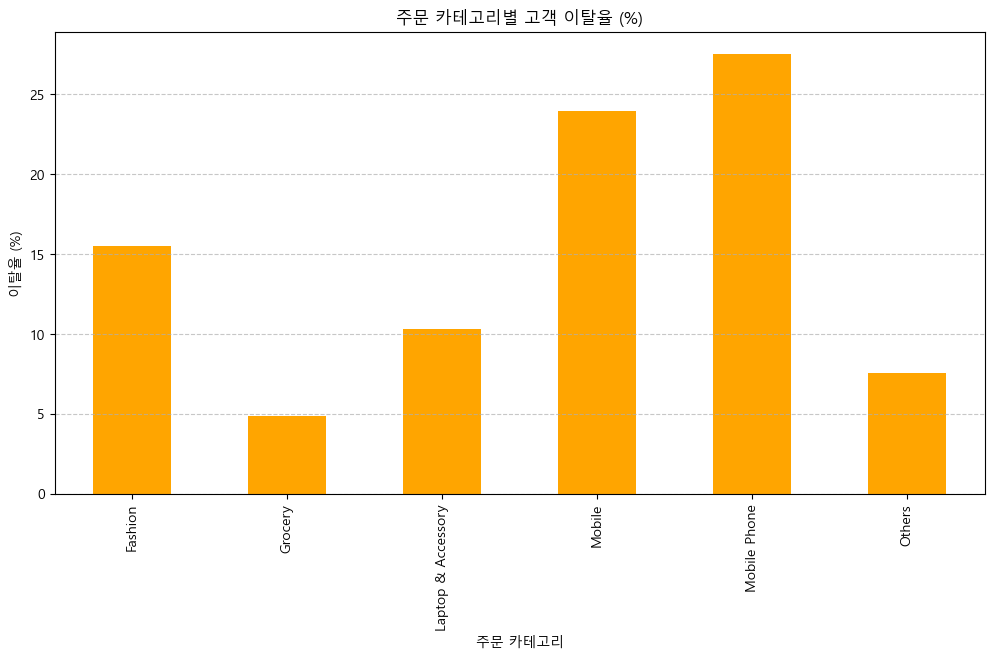

In [13]:
# 주문 카테고리별 코호트 분석
cohort_analysis_category = data.groupby('주문 카테고리').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)
cohort_analysis_category['이탈율 (%)'] = (cohort_analysis_category['이탈고객수'] / cohort_analysis_category['고객수']) * 100

# 결과 출력 및 시각화
print(cohort_analysis_category)
cohort_analysis_category['이탈율 (%)'].plot(kind='bar', figsize=(12, 6), color='orange', title='주문 카테고리별 고객 이탈율 (%)')
plt.xlabel('주문 카테고리')
plt.ylabel('이탈율 (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 앱 사용 시간 기준 코호트 분석

             고객수  이탈고객수    이탈율 (%)
앱 사용 시간 그룹                        
0-1           35      0   0.000000
1-3         4150    662  15.951807
3-5         1191    202  16.960537
5-10           0      0        NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_17760\637014160.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_analysis_app_time = data.groupby('앱 사용 시간 그룹').agg(


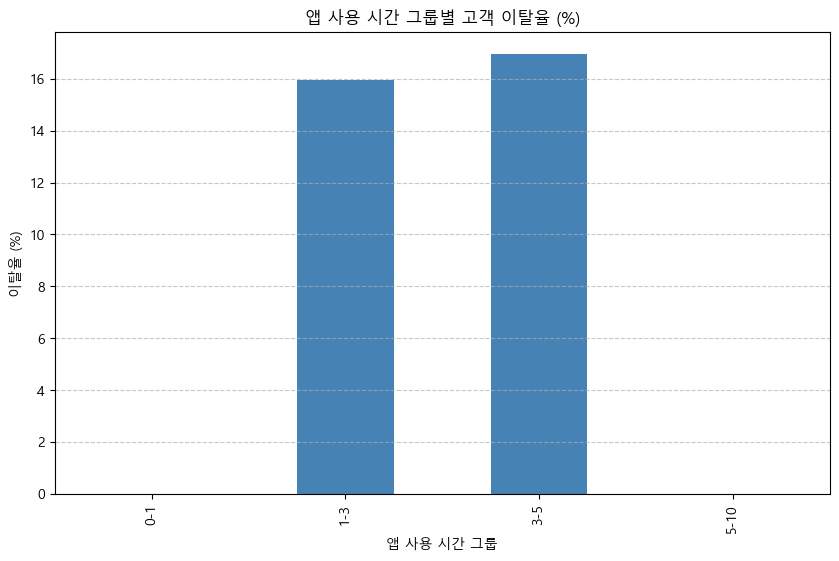

In [14]:
# 앱 사용 시간을 그룹화
data['앱 사용 시간 그룹'] = pd.cut(data['앱 사용 시간'], bins=[0, 1, 3, 5, 10], labels=['0-1', '1-3', '3-5', '5-10'])

# 코호트 분석
cohort_analysis_app_time = data.groupby('앱 사용 시간 그룹').agg(
    고객수=('고객 ID', 'count'),
    이탈고객수=('이탈 여부', 'sum')
)
cohort_analysis_app_time['이탈율 (%)'] = (cohort_analysis_app_time['이탈고객수'] / cohort_analysis_app_time['고객수']) * 100

# 결과 출력 및 시각화
print(cohort_analysis_app_time)
cohort_analysis_app_time['이탈율 (%)'].plot(kind='bar', figsize=(10, 6), color='steelblue', title='앱 사용 시간 그룹별 고객 이탈율 (%)')
plt.xlabel('앱 사용 시간 그룹')
plt.ylabel('이탈율 (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 코호트 리텐션 분석 수행 코드

가입 후 활성 일수     0           1           2           3           4           5   \
가입 연월일                                                                          
2023-01-01  100.0  125.000000  158.333333   66.666667  191.666667  100.000000   
2023-01-31  100.0  113.636364   72.727273  131.818182   86.363636  118.181818   
2023-03-02  100.0  100.000000   66.666667   50.000000   50.000000  100.000000   
2023-04-01  100.0  112.500000   75.000000   68.750000   81.250000  137.500000   
2023-05-01  100.0  120.000000  200.000000  220.000000   80.000000  160.000000   
2023-05-31  100.0  116.666667  116.666667  100.000000   83.333333   50.000000   
2023-06-30  100.0  200.000000  100.000000  160.000000   60.000000   60.000000   
2023-07-30  100.0   55.555556  133.333333  111.111111  100.000000   88.888889   
2023-08-29  100.0   30.000000   60.000000  120.000000   90.000000   80.000000   
2023-09-28  100.0   87.500000   75.000000   87.500000   87.500000  100.000000   
2023-10-28  100.0  128.57142

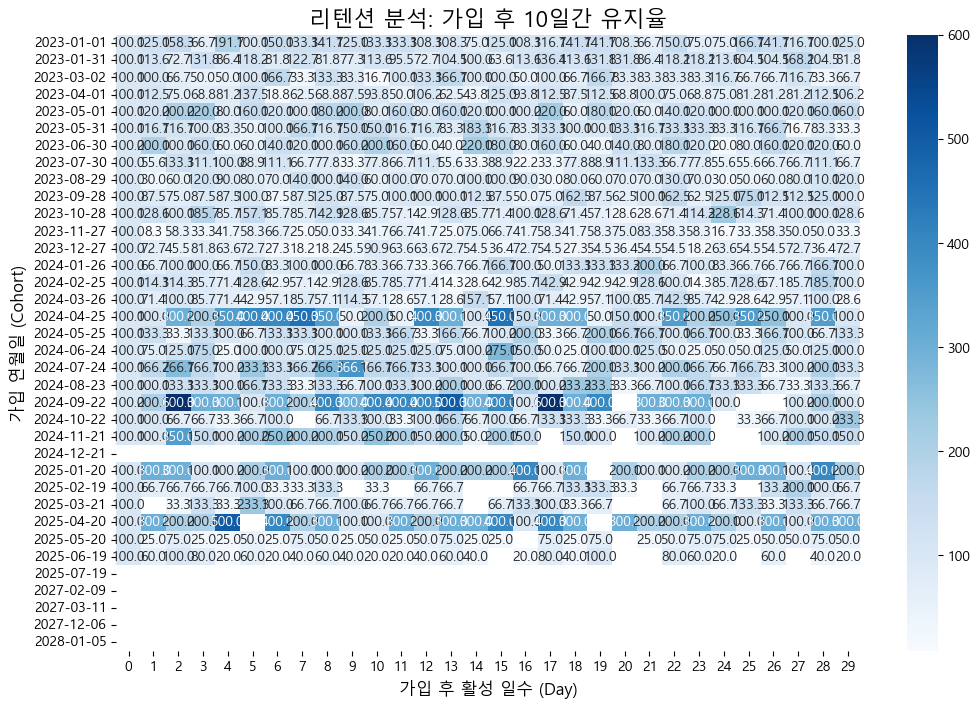

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn 라이브러리 import

# 데이터 로드
file_path = r'C:\Users\Admin\Documents\GitHub\sg_2cha\yb\쇼핑몰이탈정제.csv'
data = pd.read_csv(file_path)

# 가상 데이터: 가입 날짜를 생성 (실제 데이터에 가입 날짜가 없을 경우 추가)
data['가입 날짜'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(data['가입 기간'] * 30, unit='D')

# 구매 날짜를 가상 생성 (이탈 여부로 랜덤하게 활성일을 생성한다고 가정)
data['구매 날짜'] = data['가입 날짜'] + pd.to_timedelta(np.random.randint(0, 30, len(data)), unit='D')

# 가입 날짜 기준으로 코호트 생성
data['가입 연월일'] = data['가입 날짜'].dt.to_period('D')  # 가입 날짜를 일 단위로 그룹화

# 가입 후 활성 상태 계산 (Day 0, Day 1, ..., Day 10)
data['가입 후 활성 일수'] = (data['구매 날짜'] - data['가입 날짜']).dt.days
data['가입 후 활성 상태'] = np.where(data['가입 후 활성 일수'] <= 10, 1, 0)  # 10일 내 활성 여부

# 코호트 데이터프레임 생성
cohort = data.groupby(['가입 연월일', '가입 후 활성 일수']).agg(사용자수=('고객 ID', 'nunique')).reset_index()

# 피벗 테이블 생성 (코호트 테이블)
cohort_pivot = cohort.pivot(index='가입 연월일', columns='가입 후 활성 일수', values='사용자수')

# Day 0 기준 비율 계산 (리텐션 비율)
cohort_size = cohort_pivot[0]  # Day 0의 사용자 수
retention = cohort_pivot.divide(cohort_size, axis=0) * 100  # 퍼센트로 변환

# 결과 출력
print(retention)

# 그래프 시각화
plt.figure(figsize=(12, 8))
plt.title('리텐션 분석: 가입 후 10일간 유지율', fontsize=16)
sns.heatmap(retention, annot=True, fmt='.1f', cmap='Blues', cbar=True)
plt.xlabel('가입 후 활성 일수 (Day)', fontsize=12)
plt.ylabel('가입 연월일 (Cohort)', fontsize=12)
plt.show()


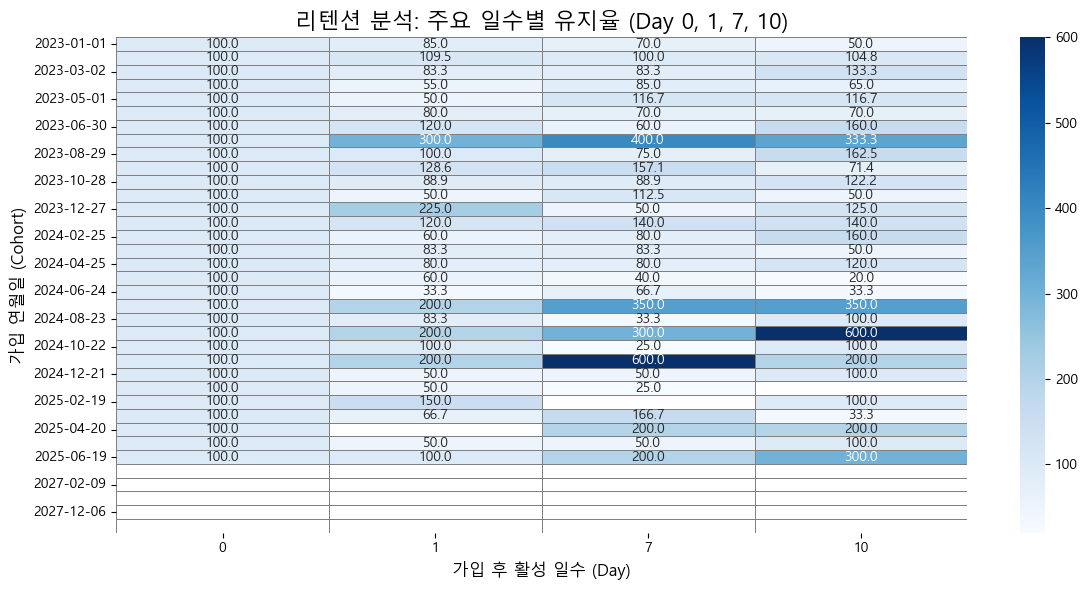

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Day 0, Day 1, Day 7, Day 10만 선택
selected_days = [0, 1, 7, 10]
filtered_retention = retention[selected_days]

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.title('리텐션 분석: 주요 일수별 유지율 (Day 0, 1, 7, 10)', fontsize=16)
sns.heatmap(
    filtered_retention, 
    annot=True, 
    fmt='.1f', 
    cmap='Blues', 
    cbar=True, 
    linewidths=0.5, 
    linecolor='gray'
)
plt.xlabel('가입 후 활성 일수 (Day)', fontsize=12)
plt.ylabel('가입 연월일 (Cohort)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 가입날짜와 활성날짜 임의로 추가해 재진행

가입 후 활성 일수     0           1           2           3           4           5   \
가입 연월일                                                                          
2023-01-01  100.0   42.857143   71.428571   76.190476   38.095238   71.428571   
2023-01-31  100.0  188.235294  147.058824  129.411765   82.352941   82.352941   
2023-03-02  100.0   62.500000   37.500000   25.000000   75.000000   12.500000   
2023-04-01  100.0  222.222222  133.333333   88.888889  155.555556  166.666667   
2023-05-01  100.0   50.000000  137.500000   87.500000   50.000000  112.500000   
2023-05-31  100.0  100.000000  180.000000  160.000000  200.000000  100.000000   
2023-06-30  100.0  175.000000   25.000000  125.000000  100.000000  175.000000   
2023-07-30  100.0   80.000000   70.000000   50.000000   90.000000   60.000000   
2023-08-29  100.0  133.333333  100.000000  155.555556  133.333333   88.888889   
2023-09-28  100.0   81.818182   45.454545   72.727273  109.090909   45.454545   
2023-10-28  100.0   66.66666

c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53584 (\N{HANGUL SYLLABLE TEN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL

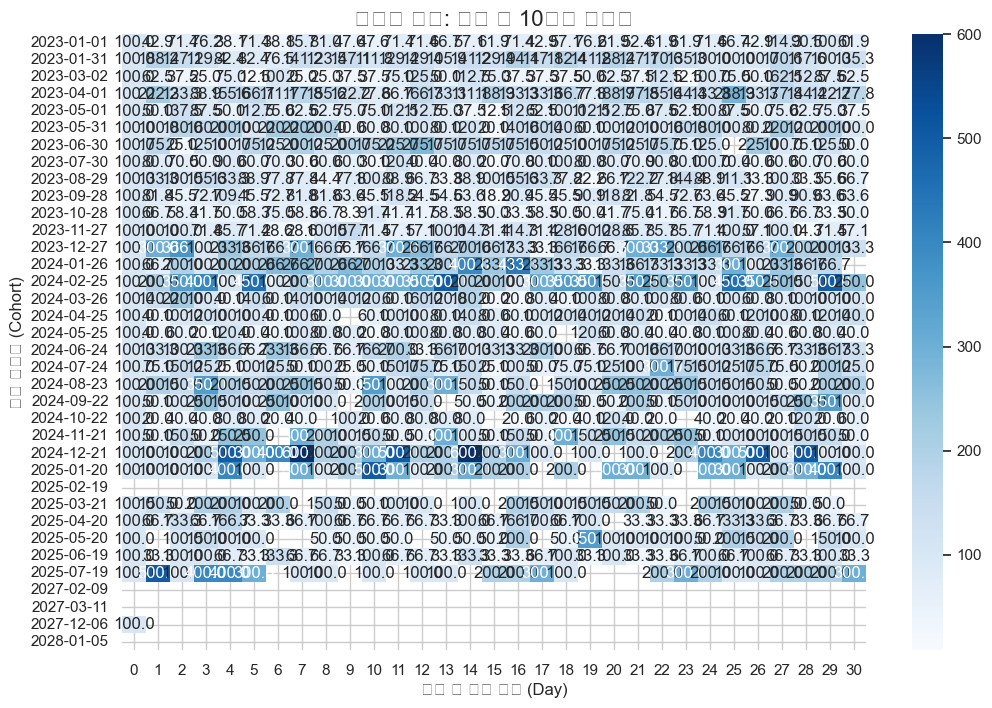

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn 라이브러리 import

# 데이터 로드
file_path = r'C:\Users\Admin\Documents\GitHub\sg_2cha\yb\데이터_코호트_분석용.csv'
data = pd.read_csv(file_path)

# 가입 날짜 기준으로 코호트 생성
data['가입 연월일'] = data['가입 날짜'].astype('datetime64[ns]').dt.to_period('D')  # 가입 날짜를 일 단위로 그룹화

# 가입 후 활성 상태 계산 (Day 0, Day 1, ..., Day 10)
data['가입 후 활성 일수'] = (pd.to_datetime(data['활성 날짜']) - pd.to_datetime(data['가입 날짜'])).dt.days
data['가입 후 활성 상태'] = np.where(data['가입 후 활성 일수'] <= 10, 1, 0)  # 10일 내 활성 여부

# 코호트 데이터프레임 생성
cohort = data.groupby(['가입 연월일', '가입 후 활성 일수']).agg(사용자수=('고객 ID', 'nunique')).reset_index()

# 피벗 테이블 생성 (코호트 테이블)
cohort_pivot = cohort.pivot(index='가입 연월일', columns='가입 후 활성 일수', values='사용자수')

# Day 0 기준 비율 계산 (리텐션 비율)
cohort_size = cohort_pivot[0]  # Day 0의 사용자 수
retention = cohort_pivot.divide(cohort_size, axis=0) * 100  # 퍼센트로 변환

# 결과 출력
print(retention)

# 그래프 시각화
plt.figure(figsize=(12, 8))
plt.title('리텐션 분석: 가입 후 10일간 유지율', fontsize=16)
sns.heatmap(retention, annot=True, fmt='.1f', cmap='Blues', cbar=True)
plt.xlabel('가입 후 활성 일수 (Day)', fontsize=12)
plt.ylabel('가입 연월일 (Cohort)', fontsize=12)
plt.show()


## 리텐션 분석에 적합한 데이터 마련

가입 후 활성 일수     0           1           2           3           4           5   \
가입 연월일                                                                          
2023-01-01  100.0   42.857143   71.428571   76.190476   38.095238   71.428571   
2023-01-31  100.0  188.235294  147.058824  129.411765   82.352941   82.352941   
2023-03-02  100.0   62.500000   37.500000   25.000000   75.000000   12.500000   
2023-04-01  100.0  222.222222  133.333333   88.888889  155.555556  166.666667   
2023-05-01  100.0   50.000000  137.500000   87.500000   50.000000  112.500000   
2023-05-31  100.0  100.000000  180.000000  160.000000  200.000000  100.000000   
2023-06-30  100.0  175.000000   25.000000  125.000000  100.000000  175.000000   
2023-07-30  100.0   80.000000   70.000000   50.000000   90.000000   60.000000   
2023-08-29  100.0  133.333333  100.000000  155.555556  133.333333   88.888889   
2023-09-28  100.0   81.818182   45.454545   72.727273  109.090909   45.454545   
2023-10-28  100.0   66.66666

c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53584 (\N{HANGUL SYLLABLE TEN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Admin\anaconda3\envs\game_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL

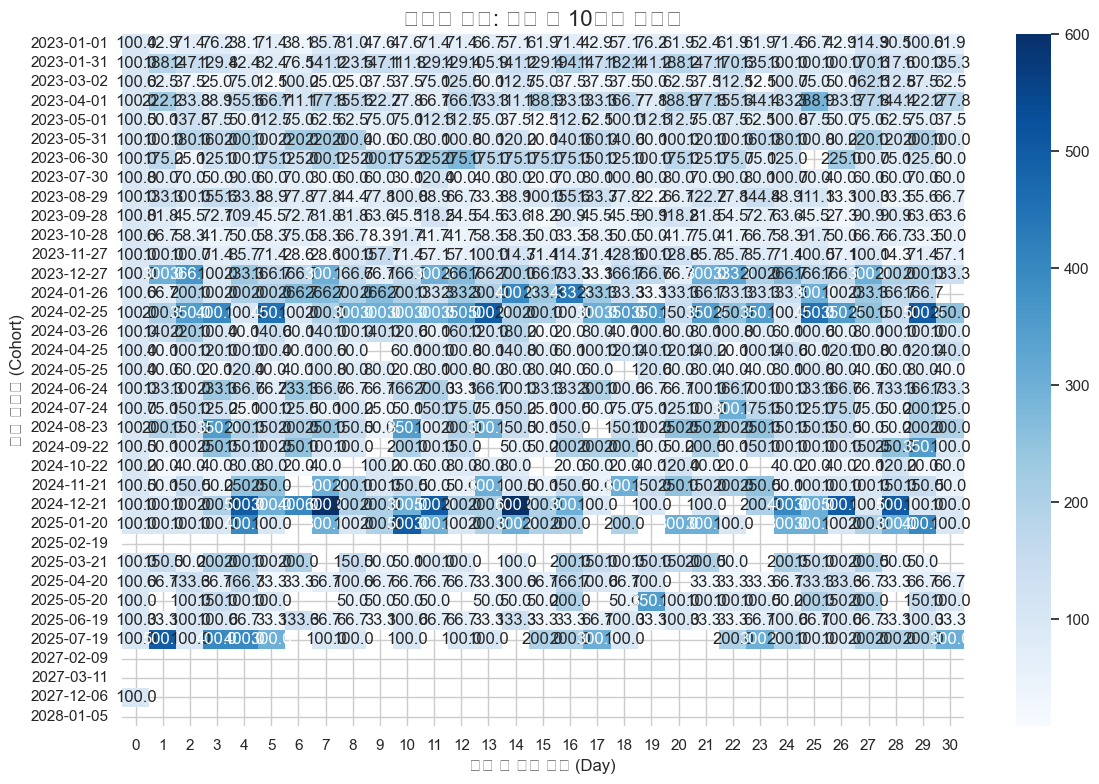

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn 라이브러리 import

# 데이터 로드
file_path = r'C:\Users\Admin\Documents\GitHub\sg_2cha\yb\수정된_데이터_코호트_분석용.csv'
data = pd.read_csv(file_path)

# 가입 날짜와 활성 날짜를 datetime 형식으로 변환
data['가입 날짜'] = pd.to_datetime(data['가입 날짜'])
data['활성 날짜'] = pd.to_datetime(data['활성 날짜'])

# 가입 날짜 기준으로 코호트 생성 (가입 연월일)
data['가입 연월일'] = data['가입 날짜'].dt.to_period('D')  # 가입 날짜를 일 단위로 그룹화

# 가입 후 활성 일수 계산 (Day 0, Day 1, ..., Day 10)
data['가입 후 활성 일수'] = (data['활성 날짜'] - data['가입 날짜']).dt.days

# 코호트 데이터프레임 생성
cohort = data.groupby(['가입 연월일', '가입 후 활성 일수']).agg(사용자수=('고객 ID', 'nunique')).reset_index()

# 피벗 테이블 생성 (코호트 테이블)
cohort_pivot = cohort.pivot(index='가입 연월일', columns='가입 후 활성 일수', values='사용자수')

# Day 0 기준 비율 계산 (리텐션 비율)
cohort_size = cohort_pivot[0]  # Day 0의 사용자 수
retention = cohort_pivot.divide(cohort_size, axis=0) * 100  # 퍼센트로 변환

# 결과 출력
print(retention)

# Heatmap 시각화
plt.figure(figsize=(12, 8))
plt.title('리텐션 분석: 가입 후 10일간 유지율', fontsize=16)
sns.heatmap(retention, annot=True, fmt='.1f', cmap='Blues', cbar=True)
plt.xlabel('가입 후 활성 일수 (Day)', fontsize=12)
plt.ylabel('가입 연월일 (Cohort)', fontsize=12)
plt.tight_layout()
plt.show()
